In [1]:
%matplotlib inline
import dlib
import numpy as np
import cv2
from matplotlib import pyplot as plt

PREDICTOR_PATH = "./shape_predictor_68_face_landmarks.dat"


rectangles[[(233, 357) (788, 911)]]


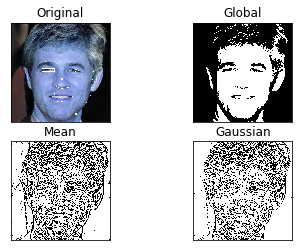

In [ ]:
%matplotlib inline
import cv2
import dlib
from matplotlib import pyplot as plt
import numpy as np

detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor("./shape_predictor_68_face_landmarks.dat")
img = cv2.imread("./8.jpg")
img2 = cv2.imread("./8.jpg", 0)
faces = detector(img,1)
print(faces) 

# 얼굴 저장 눈썹 저장 눈 저장 코저장 입저장
x = []
y = []

Right_Eyebrow_bottom = 0
Left_Eyebrow_bottom = 0

Right_Eyebrow_right = 0
Left_Eyebrow_left = 0

if (len(faces) > 0): # 얼굴이 있다면 
    for k,d in enumerate(faces):
        cv2.rectangle(img,(d.left(),d.top()),(d.right(),d.bottom()),(255,255,255))
        shape = landmark_predictor(img,d)
        
        for i in range(0,68):
            if i > 16:
                x.append(shape.part(i).x)
                y.append(shape.part(i).y)
                
            cv2.circle(img, (shape.part(i).x, shape.part(i).y),2,(0,255,0), -1, 8)
            cv2.putText(img,str(i),(shape.part(i).x,shape.part(i).y),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,2555,255))
            
            
            if i == 21 or i == 26 or i == 35 or i == 41 or i == 47 or i == 67:
                if i == 21:
                    Right_Eyebrow_bottom = max(y)
                    Right_Eyebrow_right = max(x)

                elif i == 26:
                    Left_Eyebrow_bottom = max(y)
                    Left_Eyebrow_left = min(x)

                if i == 41:
                    Right_Eyebrow_bottom = int((min(y) - Right_Eyebrow_bottom) / 2)
                    Right_Eyebrow_right = int((Right_Eyebrow_right - max(x)) / 2)
                    cv2.rectangle(img, ((min(x) - Right_Eyebrow_right), (min(y) - Right_Eyebrow_bottom)), ((max(x) + Right_Eyebrow_right), (max(y) + Right_Eyebrow_bottom)), (255,255,255))
                    
                    save_img = img2[(min(y) - Right_Eyebrow_bottom):(max(y) + Right_Eyebrow_bottom), (min(x) - Right_Eyebrow_right):(max(x) + Right_Eyebrow_right)]
                    cv2.imwrite('../Data/paper/'+str(i)+'.jpg', save_img)
                    
                    
                elif i == 47:
                    Left_Eyebrow_bottom = int((min(y) - Left_Eyebrow_bottom) / 2)
                    Left_Eyebrow_left = int((min(x) - Left_Eyebrow_left) / 2)
                    cv2.rectangle(img, ((min(x) - Left_Eyebrow_left), (min(y) - Left_Eyebrow_bottom)), ((max(x) + Left_Eyebrow_left), (max(y) + Left_Eyebrow_bottom)), (255,255,255))
                    
                    save_img = img2[(min(y) - Left_Eyebrow_bottom):(max(y) + Left_Eyebrow_bottom), (min(x) - Left_Eyebrow_left):(max(x) + Left_Eyebrow_left)]
                    cv2.imwrite('../Data/paper/'+str(i)+'.jpg', save_img)
                else:
                    cv2.rectangle(img, (min(x), min(y)), (max(x), max(y)), (255,255,255))
                    
                    save_img = img2[min(y):max(y), min(x):max(x)]
                    cv2.imwrite('../Data/paper/'+str(i)+'.jpg', save_img)
                del x[:]
                del y[:]
        
cv2.imshow('Frame',img)
cv2.waitKey(0)

In [ ]:
'''
Points 0 to 16 is the Jawline
Points 17 to 21 is the Right Eyebrow
Points 22 to 26 is the Left Eyebrow
Points 27 to 35 is the Nose
Points 36 to 41 is the Right Eye
Points 42 to 47 is the Left Eye
Points 48 to 60 is Outline of the Mouth
Points 61 to 67 is the Inner line of the Mouth
'''

